In [12]:
import pandas as pd
import numpy as np
train=pd.read_csv('../input/train.csv')
train.tail()

# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

#train.isnull().any(axis=1).any()
train_copy=train
train_copy=train_copy.replace(-1,np.NaN)
train_copy.isnull().any().any()



The train dataset contains 595212 rows and 59 columns


True

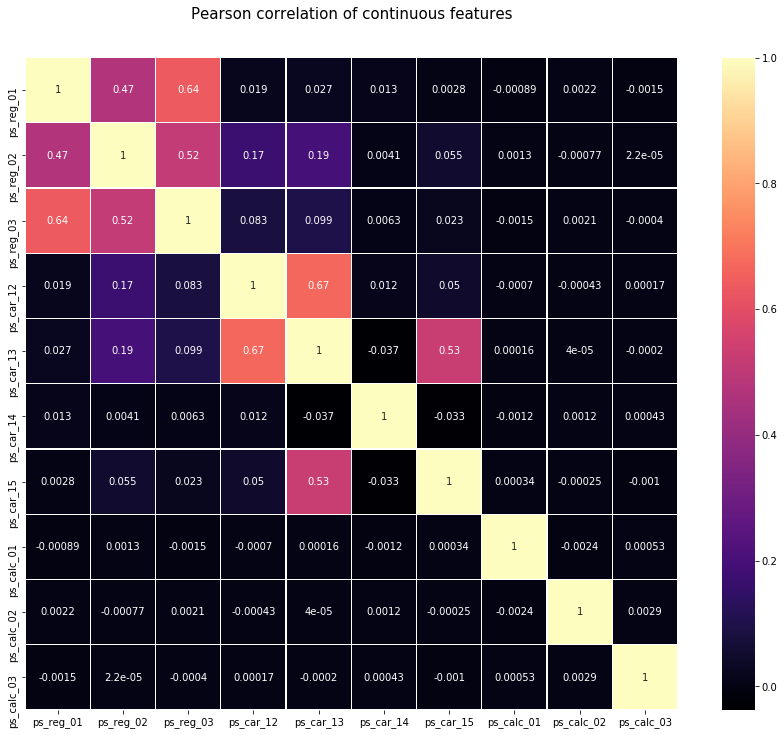

In [24]:
from collections import Counter
#print(train.dtypes.values)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [28]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
print(train.target)
print(train.drop(['id','target'],axis=1))

rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        1
29        0
         ..
595182    0
595183    0
595184    0
595185    0
595186    0
595187    0
595188    0
595189    0
595190    0
595191    0
595192    0
595193    0
595194    0
595195    0
595196    0
595197    0
595198    0
595199    0
595200    0
595201    0
595202    0
595203    0
595204    0
595205    0
595206    0
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64
        ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               2              2          5              1              0   
1               1              1          7              0             

NameError: name 'rf' is not defined

             id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
5            19       0          5              1          4              0   
6            20       0          2              1          3              1   
7            22       0          5              1          4              0   
8            26       0          5              1          3              1   
9            28       1          1              1          2              0   
10           34       0          5              2          2              0   
11           35       0          2              1   

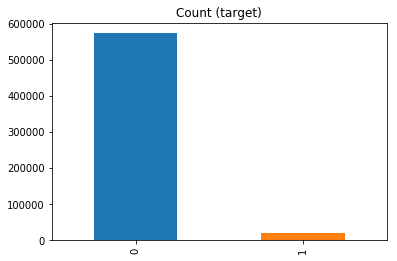

In [34]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('../input/train.csv')
print(df_train)
target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_train=pd.read_csv('../input/train.csv')
#print(df_train.columns[2:])
labels=df_train.columns[2:]

X=df_train[labels]
y=df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%"%(accuracy*100))

model.fit(X_train[['ps_calc_01']],y_train)
y_pred=clf.predict(X_test[['ps_calc_01']])

acc=accuracy_score(y_test,y_pred)

print('accuracy_feature : %.2f%%' %(acc*100))


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 96.36%
accuracy_feature : 96.36%


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df_train=pd.read_csv('../input/train.csv')
#print(df_train.columns[2:])
labels=df_train.columns[2:]

X=df_train[labels]
y=df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)


clf=XGBClassifier()
clf.fit(X_train[['ps_calc_01']],y_train)
y_pred=clf.predict(X_test[['ps_calc_01']])

acc=accuracy_score(y_test,y_pred)

print('accuracy_feature : %.2f%%' %(acc*100))

accuracy_feature : 96.36%


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


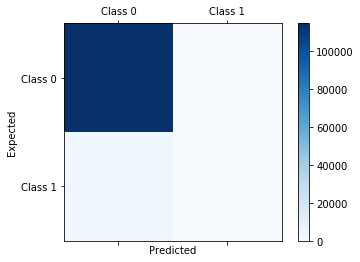

In [47]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat=confusion_matrix(y_true=y_test,y_pred=y_pred)
#df=pd.DataFrame(conf_mat)
#df

labels = ['Class 0', 'Class 1']
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

573518
21694
(21694, 59)
Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64
Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


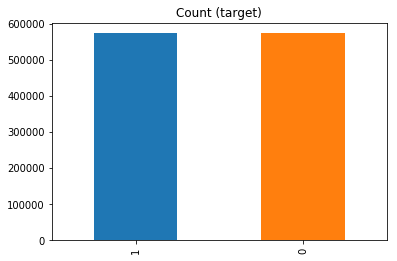

In [13]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()
print(count_class_0)
print(count_class_1)
# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

#sampleメソッドで、引数の数分ランダムに抽出する
df_class_0_under = df_class_0.sample(count_class_1)
print(df_class_0_under.shape)

#concat,axis=0で縦方向に二つのデータを連結する
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

#Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())
df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

          0         1         2         3         4         5         6   \
0   0.327419 -0.123936  0.377707 -0.650123  0.267562  1.228781  2.208772   
1  -0.843981 -0.018691 -0.841018  1.374583  0.157199 -0.599719  2.217041   
2  -0.204642  0.472155 -0.140616 -2.902493 -1.513665  1.149545  2.283673   
3   0.208274 -0.156982  0.063369 -0.545759 -0.395416 -2.679969  1.507772   
4   0.785568  0.208472  0.760082 -0.046130  0.310844 -0.403927  1.462897   
5  -0.886195  0.548814 -1.844824  0.638066  0.023932  0.491861  0.722346   
6  -1.396231  1.175303 -0.444875 -0.061029  0.521757 -0.143775  1.580864   
7   2.518215 -0.242515 -0.632592 -2.613839 -0.180870  1.268051  0.951805   
8   0.711901 -2.016997 -1.256924 -1.367869 -0.330754  0.061428  1.003502   
9  -2.068195  0.267997 -0.384181 -0.183092 -0.609841 -0.162082  1.504678   
10 -0.149148  0.317306  0.515053  1.328774 -1.529940  1.336910  1.726808   
11  0.616225  0.214431  1.565768 -0.395414 -0.252711 -1.145533  3.408878   
12 -0.221721

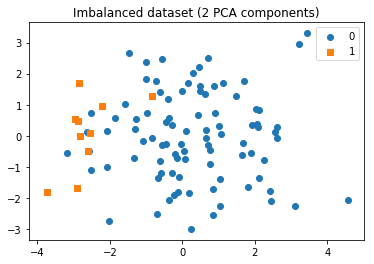

In [24]:
from sklearn.datasets import make_classification

#make_classification簡単にサンプルデータを作成できる
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
print(df)
print(y)
df['target'] = y
#f.target.value_counts().plot(kind='bar', title='Count (target)');

import numpy as np
from matplotlib import pyplot as plt

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

#pandsのオプションを変える
pd.set_option('display.max_columns', 100)
#データの読み込み
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

train.head()
train.tail()
train.shape

#重複した行を削除: drop_duplicates()
#ないことを確認
train.drop_duplicates()
train.shape

(595212, 59)

In [16]:
test.shape
train.info()
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
meta
meta[(meta.level == 'nominal') & (meta.keep)].index
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

,target,ps_ind_01,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

print(idx_1)

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

#rint(train.loc[idx_0])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

print(train.shape)
vars_with_missing = []
#NaNの部分のチェック。今回はー１が入っている
for f in train.columns:
    missings = train[train[f] == -1][f].count()

    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()


Int64Index([     9,     19,     28,     39,     41,     65,     87,    108,
               191,    224,
            ...
            594968, 594975, 594980, 594982, 594985, 595006, 595046, 595099,
            595113, 595158],
           dtype='int64', length=21694)
Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246
(216940, 59)
Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_03 has 12 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values
Variable ps_car_11 has 4 distinct values


In [19]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [20]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

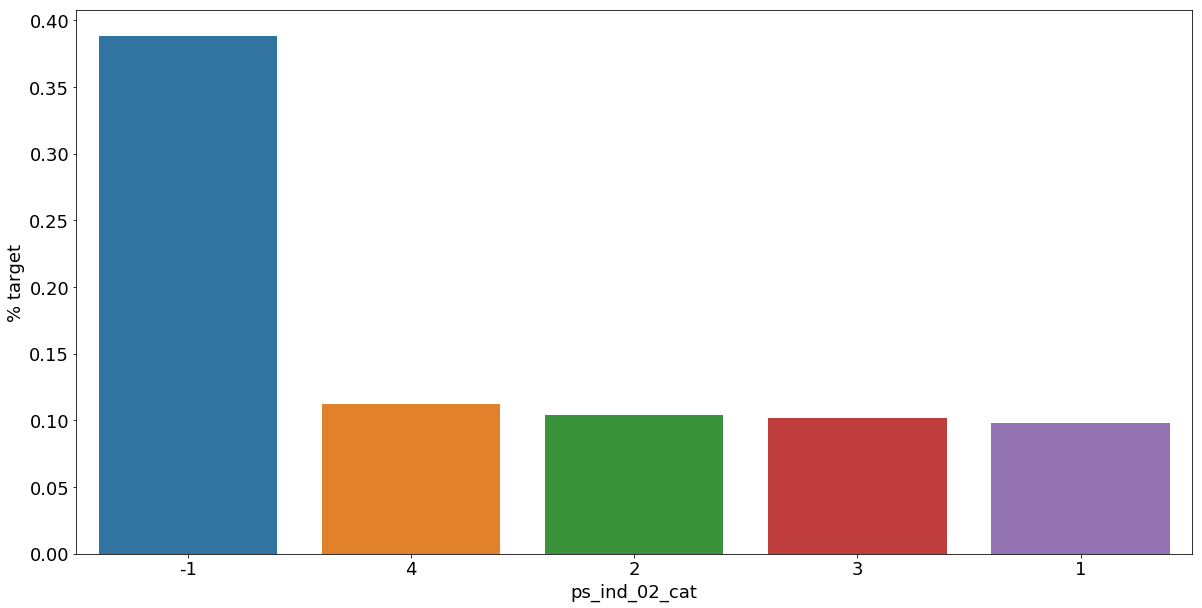

<Figure size 432x288 with 0 Axes>

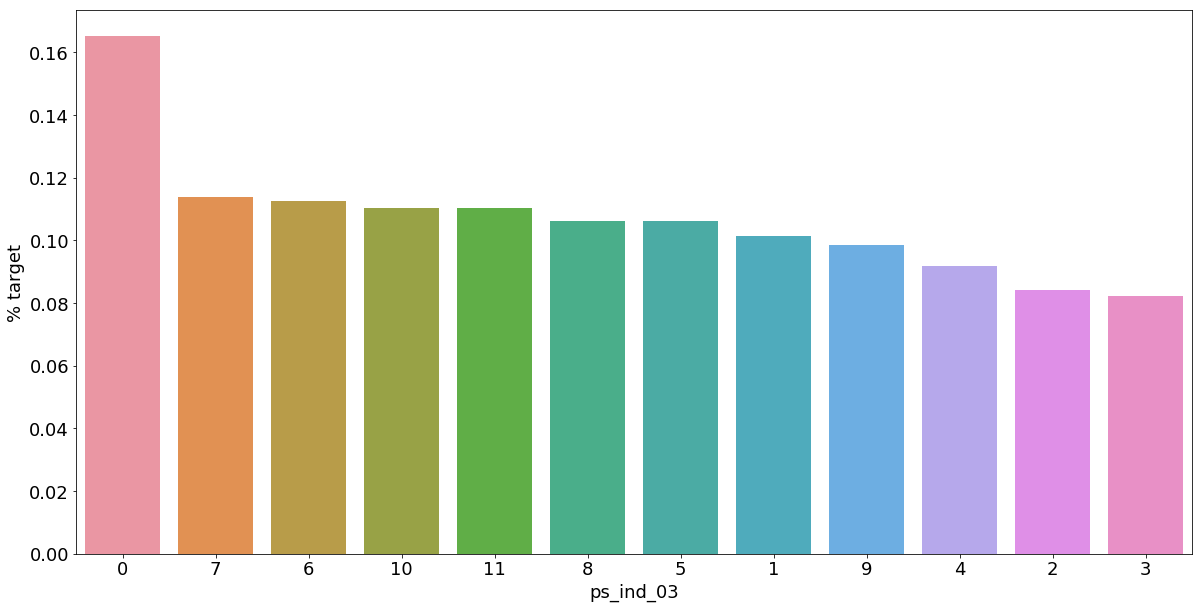

<Figure size 432x288 with 0 Axes>

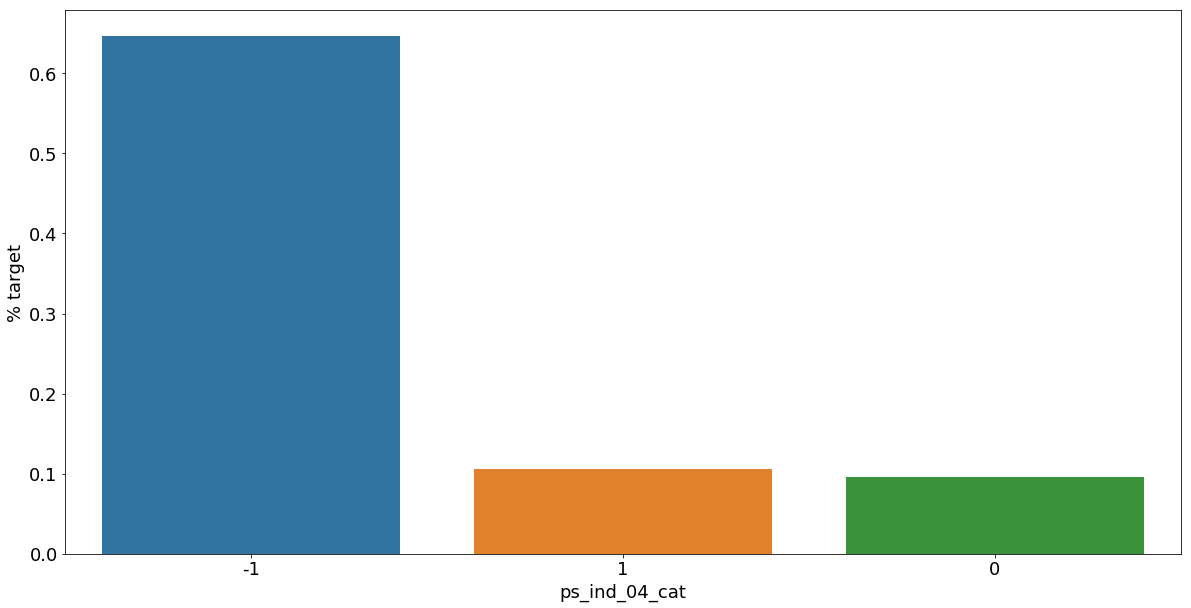

<Figure size 432x288 with 0 Axes>

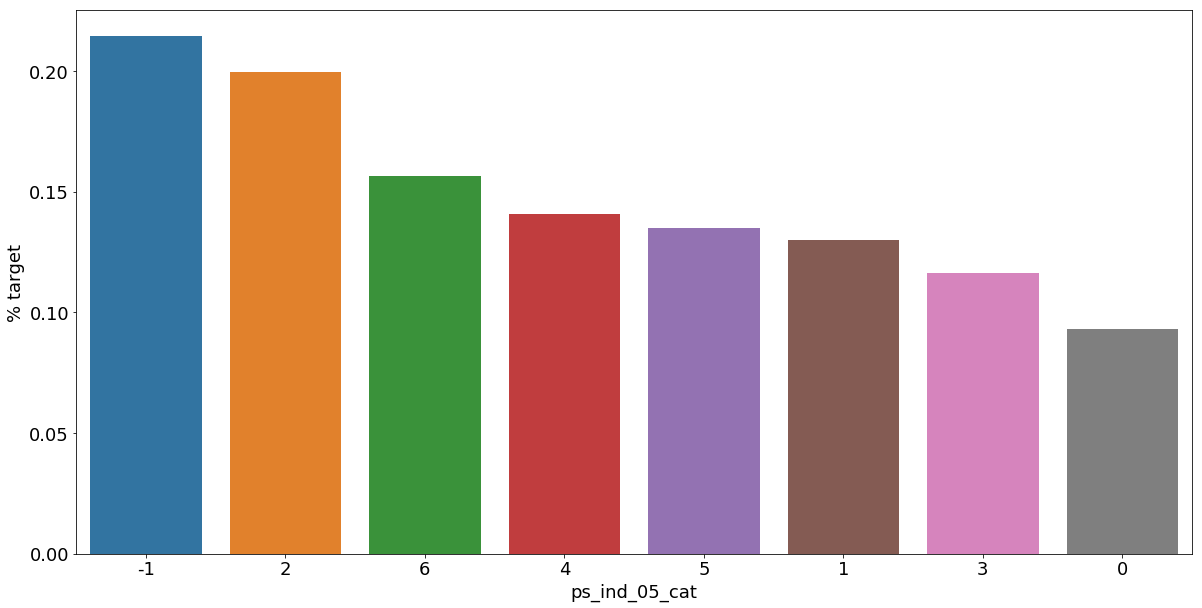

<Figure size 432x288 with 0 Axes>

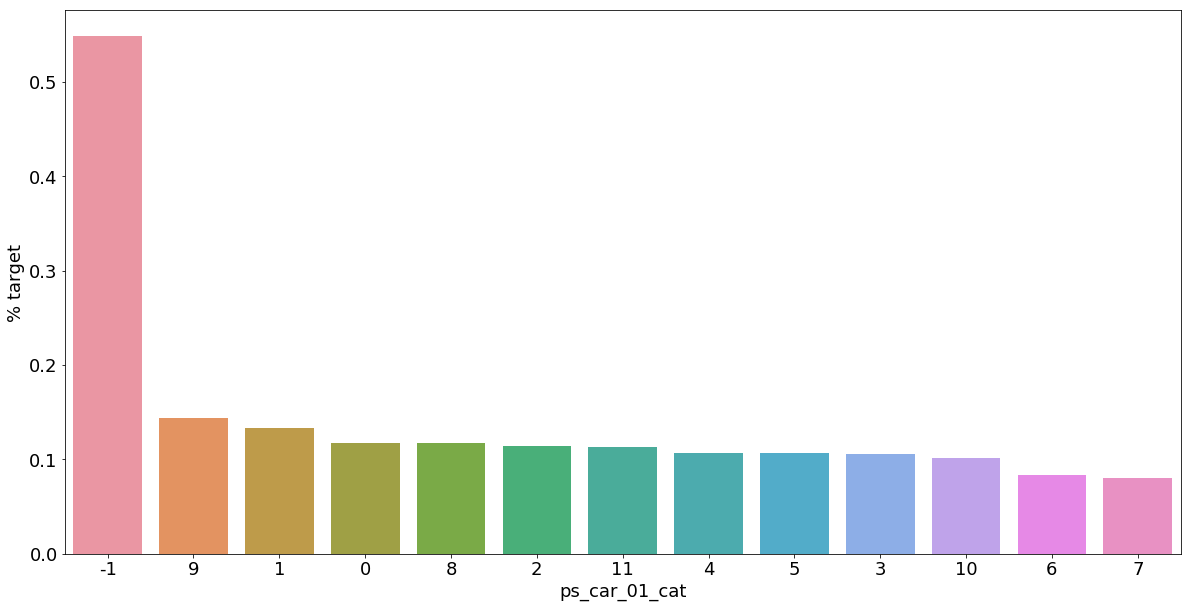

<Figure size 432x288 with 0 Axes>

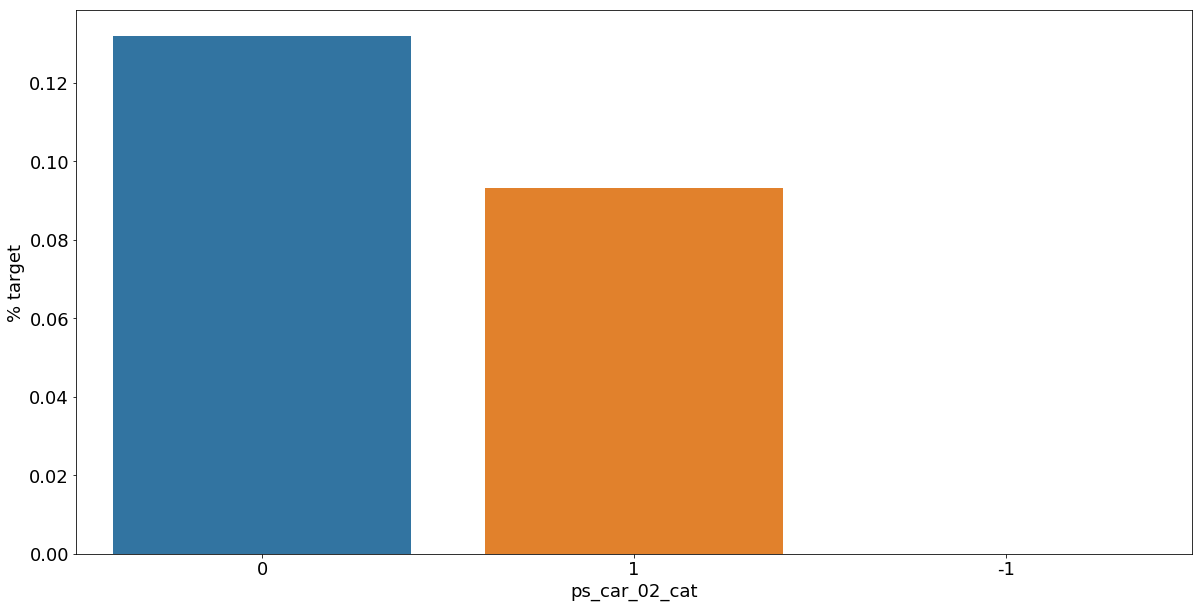

<Figure size 432x288 with 0 Axes>

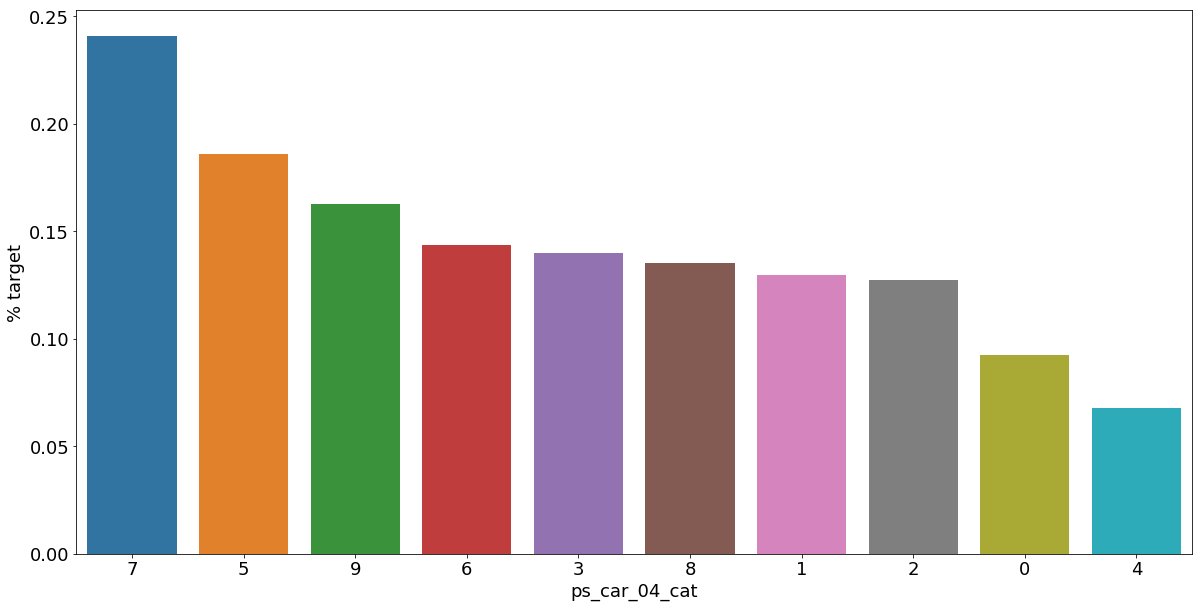

<Figure size 432x288 with 0 Axes>

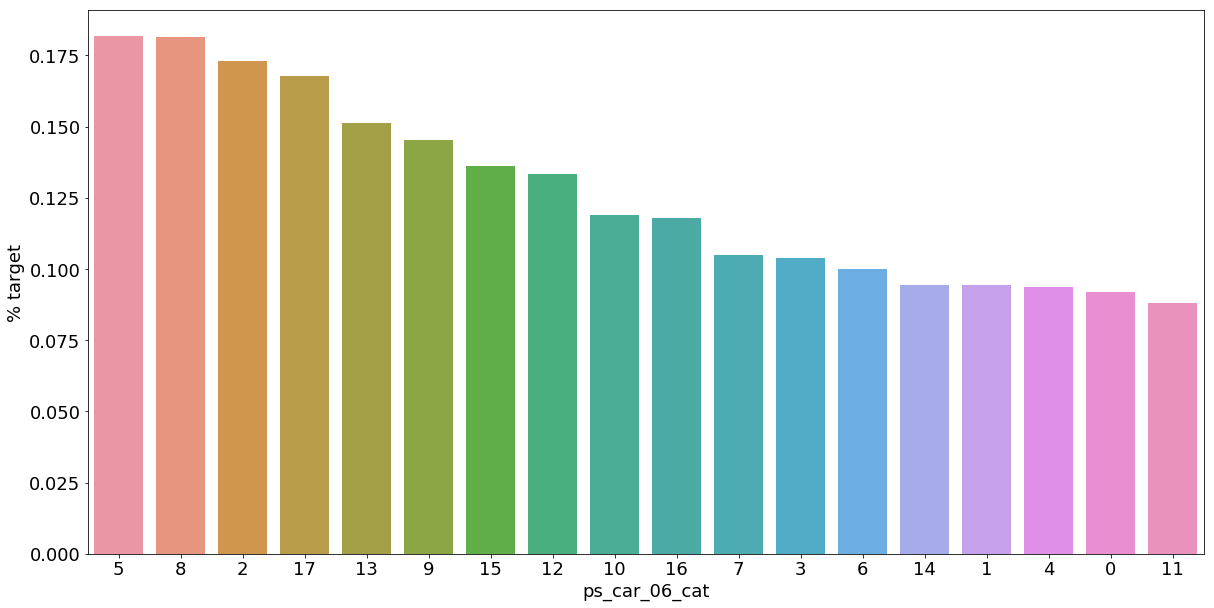

<Figure size 432x288 with 0 Axes>

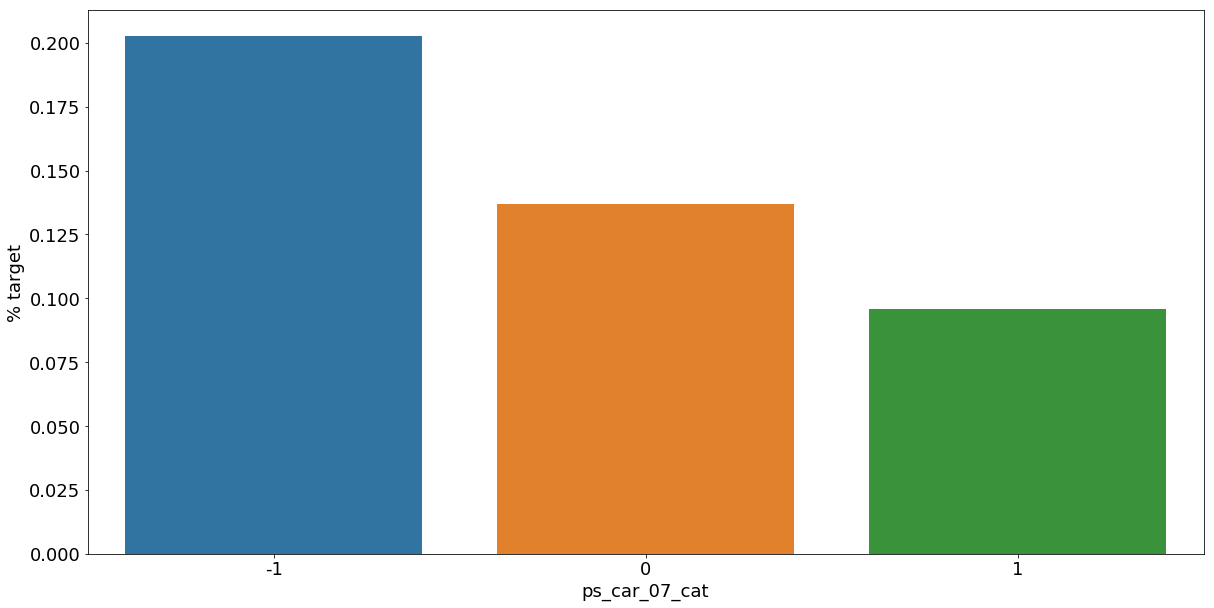

<Figure size 432x288 with 0 Axes>

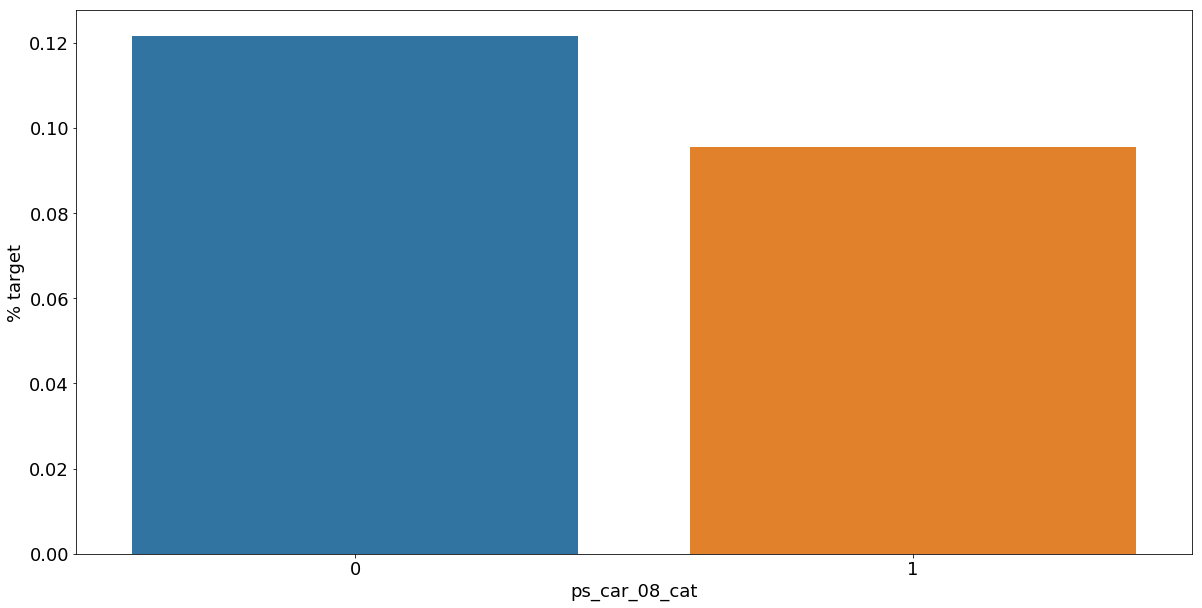

<Figure size 432x288 with 0 Axes>

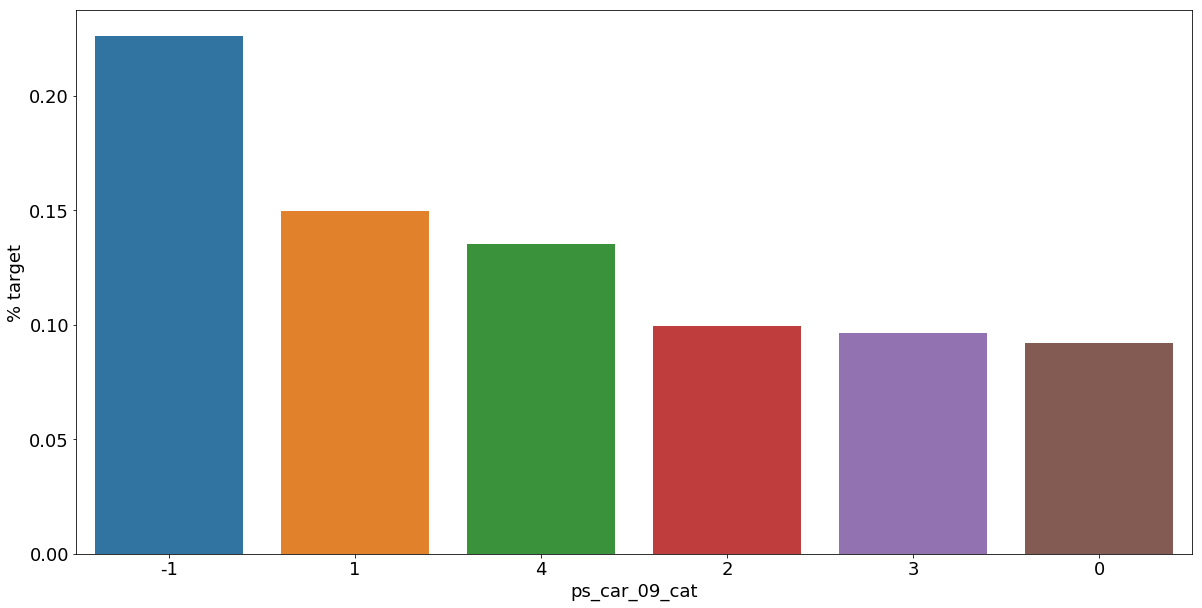

<Figure size 432x288 with 0 Axes>

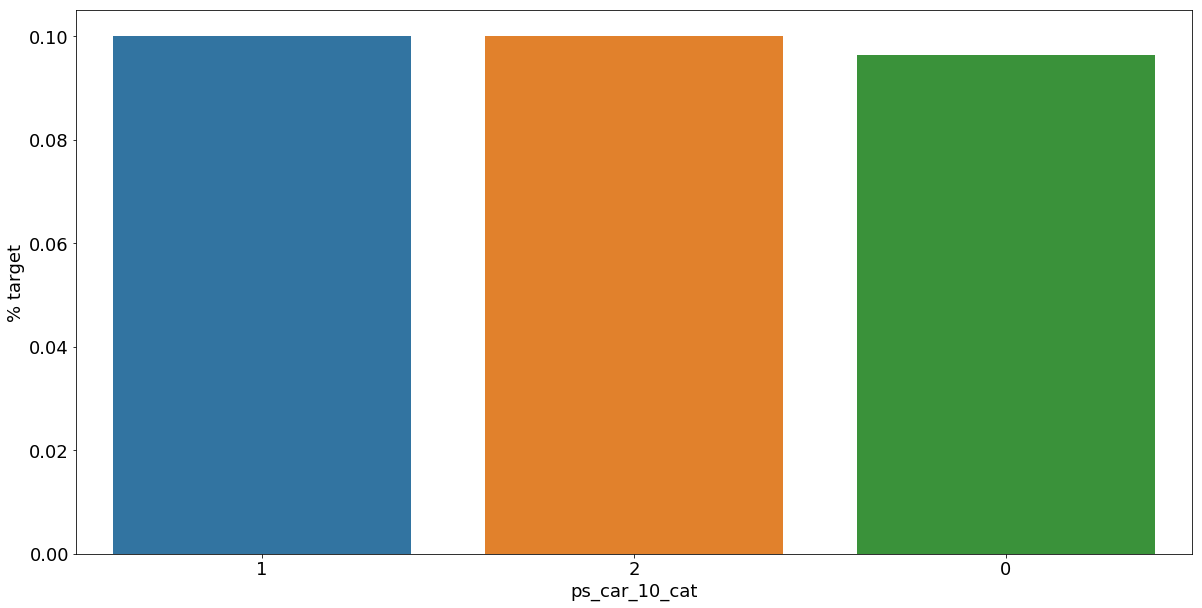

<Figure size 432x288 with 0 Axes>

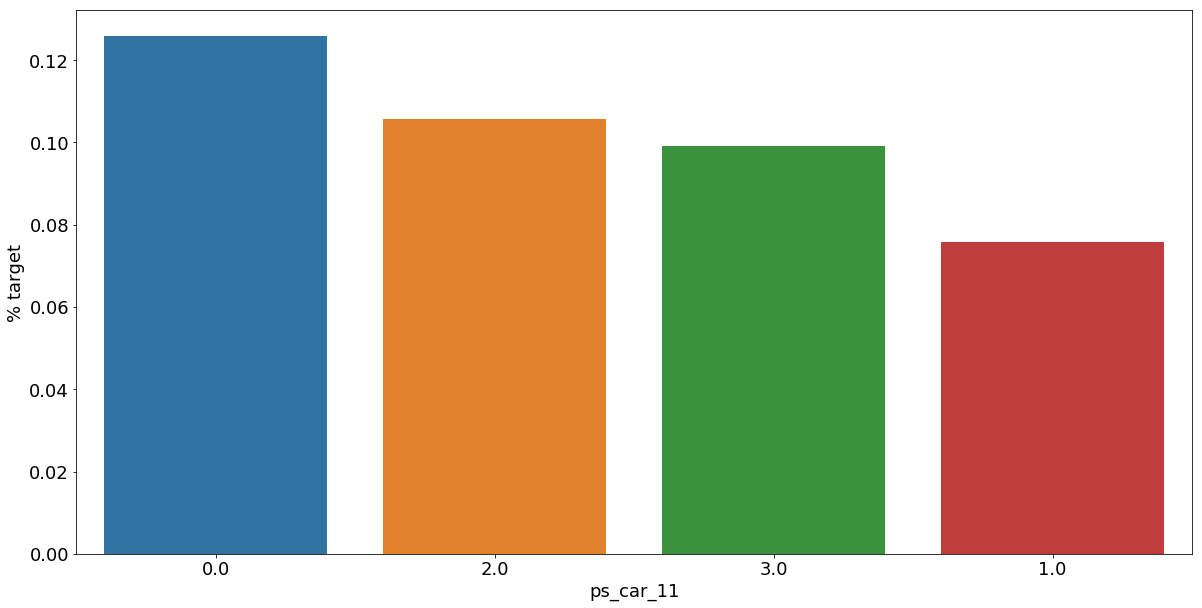

In [21]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

Index([], dtype='object', name='varname')


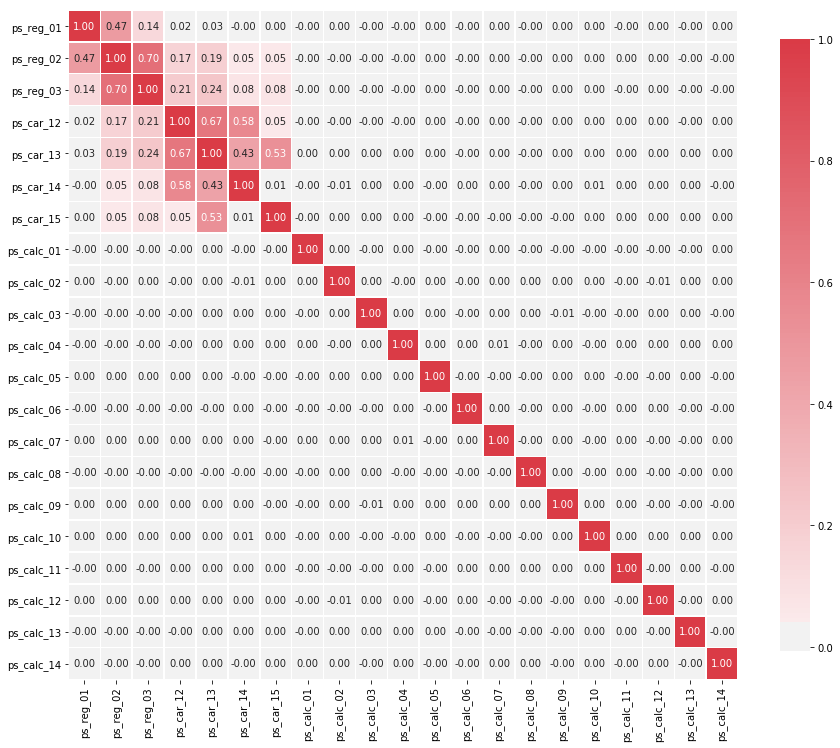

In [35]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
print(v)    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

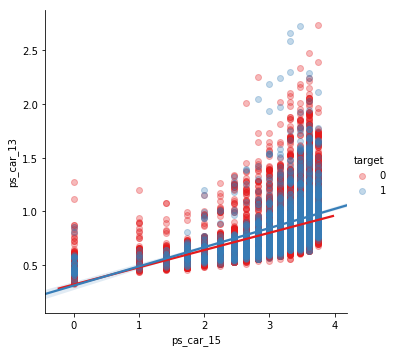

In [29]:
s = train.sample(frac=0.1)
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

In [36]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))

#get_dummiesカテゴリ変数（カテゴリカルデータ、質的データ）をダミー変数に変換
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 121 variables in train


In [37]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 121 variables in train
After creating interactions we have 352 variables in train


In [39]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))
v

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


Index(['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2',
       'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2',
       'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5',
       'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2',
       'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12',
       'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4',
       'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2',
       'ps_car_12 ps_car_14', 'ps_car_14^2'],
      dtype='object')

In [40]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns
#分類気にランダムフォレストを用いる
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
#feature_importances_で重要な特徴量を格納する
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.008807
 2) ps_car_13 ps_calc_06           0.006694
 3) ps_car_13 ps_calc_08           0.006635
 4) ps_car_13                      0.006594
 5) ps_car_13^2                    0.006593
 6) ps_car_12 ps_car_13            0.006499
 7) ps_car_13 ps_car_14            0.006474
 8) ps_reg_01 ps_car_13            0.006302
 9) ps_reg_03 ps_car_13            0.006262
10) ps_car_13 ps_car_15            0.006257
11) ps_car_14 ps_calc_08           0.006097
12) ps_car_14 ps_calc_06           0.006086
13) ps_car_14 ps_car_15            0.005893
14) ps_reg_03 ps_car_14            0.005828
15) ps_car_13 ps_calc_14           0.005812
16) ps_car_13 ps_calc_10           0.005766
17) ps_car_13 ps_calc_11           0.005678
18) ps_reg_03 ps_calc_08           0.005659
19) ps_reg_03 ps_car_12            0.005636
20) ps_reg_03 ps_calc_06           0.005602
21) ps_car_13 ps_calc_07           0.005509
22) ps_car_14 ps_calc_10           0.005466
23) ps_reg_03 ps_calc_10        

In [43]:
#特徴量選択
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
#boolean配列として取得するget_support()
selected_vars = list(feat_labels[sfm.get_support()])


Number of features before selection: 350
Number of features after selection: 175
['ps_ind_15', 'ps_reg_03', 'ps_car_13', 'ps_car_14', 'ps_car_11_cat_te', 'ps_reg_01 ps_reg_03', 'ps_reg_01 ps_car_12', 'ps_reg_01 ps_car_13', 'ps_reg_01 ps_car_14', 'ps_reg_01 ps_car_15', 'ps_reg_01 ps_calc_06', 'ps_reg_01 ps_calc_08', 'ps_reg_01 ps_calc_10', 'ps_reg_01 ps_calc_11', 'ps_reg_01 ps_calc_14', 'ps_reg_02 ps_reg_03', 'ps_reg_02 ps_car_12', 'ps_reg_02 ps_car_13', 'ps_reg_02 ps_car_14', 'ps_reg_02 ps_car_15', 'ps_reg_02 ps_calc_01', 'ps_reg_02 ps_calc_02', 'ps_reg_02 ps_calc_03', 'ps_reg_02 ps_calc_06', 'ps_reg_02 ps_calc_08', 'ps_reg_02 ps_calc_10', 'ps_reg_02 ps_calc_11', 'ps_reg_02 ps_calc_14', 'ps_reg_03^2', 'ps_reg_03 ps_car_12', 'ps_reg_03 ps_car_13', 'ps_reg_03 ps_car_14', 'ps_reg_03 ps_car_15', 'ps_reg_03 ps_calc_01', 'ps_reg_03 ps_calc_02', 'ps_reg_03 ps_calc_03', 'ps_reg_03 ps_calc_04', 'ps_reg_03 ps_calc_05', 'ps_reg_03 ps_calc_06', 'ps_reg_03 ps_calc_07', 'ps_reg_03 ps_calc_08', 'ps_r

In [45]:
train = train[selected_vars + ['target']]
train

,ps_ind_15,ps_reg_03,ps_car_13,ps_car_14,ps_car_11_cat_te,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_06,ps_reg_01 ps_calc_08,ps_reg_01 ps_calc_10,ps_reg_01 ps_calc_11,ps_reg_01 ps_calc_14,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_02 ps_calc_06,ps_reg_02 ps_calc_08,ps_reg_02 ps_calc_10,ps_reg_02 ps_calc_11,ps_reg_02 ps_calc_14,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_reg_03 ps_calc_04,ps_reg_03 ps_calc_05,ps_reg_03 ps_calc_06,ps_reg_03 ps_calc_07,ps_reg_03 ps_calc_08,ps_reg_03 ps_calc_09,ps_reg_03 ps_calc_10,ps_reg_03 ps_calc_11,ps_reg_03 ps_calc_12,ps_reg_03 ps_calc_13,ps_reg_03 ps_calc_14,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,...,ps_calc_02 ps_calc_11,ps_calc_02 ps_calc_13,ps_calc_02 ps_calc_14,ps_calc_03 ps_calc_04,ps_calc_03 ps_calc_06,ps_calc_03 ps_calc_07,ps_calc_03 ps_calc_08,ps_calc_03 ps_calc_09,ps_calc_03 ps_calc_10,ps_calc_03 ps_calc_11,ps_calc_03 ps_calc_13,ps_calc_03 ps_calc_14,ps_calc_04 ps_calc_06,ps_calc_04 ps_calc_08,ps_calc_04 ps_calc_10,ps_calc_04 ps_calc_11,ps_calc_04 ps_calc_14,ps_calc_05 ps_calc_08,ps_calc_05 ps_calc_10,ps_calc_05 ps_calc_11,ps_calc_05 ps_calc_14,ps_calc_06 ps_calc_07,ps_calc_06 ps_calc_08,ps_calc_06 ps_calc_09,ps_calc_06 ps_calc_10,ps_calc_06 ps_calc_11,ps_calc_06 ps_calc_13,ps_calc_06 ps_calc_14,ps_calc_07 ps_calc_08,ps_calc_07 ps_calc_10,ps_calc_07 ps_calc_11,ps_calc_07 ps_calc_13,ps_calc_07 ps_calc_14,ps_calc_08 ps_calc_09,ps_calc_08 ps_calc_10,ps_calc_08 ps_calc_11,ps_calc_08 ps_calc_13,ps_calc_08 ps_calc_14,ps_calc_09 ps_calc_10,ps_calc_09 ps_calc_11,ps_calc_09 ps_calc_14,ps_calc_10 ps_calc_11,ps_calc_10 ps_calc_12,ps_calc_10 ps_calc_13,ps_calc_10 ps_calc_14,ps_calc_11 ps_calc_13,ps_calc_11 ps_calc_14,ps_calc_12 ps_calc_14,ps_calc_13 ps_calc_14,target
0,11,0.838153,0.540603,0.345688,0.093786,0.502892,0.221269,0.324362,0.207413,1.200000,4.2,4.8,4.8,0.6,3.6,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,4.2,4.8,4.8,0.6,3.6,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,2.514458,0.000000,5.867069,2.514458,6.705222,3.352611,6.705222,0.838153,0.000000,3.352611,5.028916,0.199365,0.127483,0.737564,...,0.3,1.2,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,24.0,24.0,3.0,18.0,0.0,0.0,0.0,0.0,21.0,56.0,28.0,56.0,7.0,28.0,42.0,24.0,24.0,3.0,12.0,18.0,32.0,64.0,8.0,32.0,48.0,32.0,4.0,24.0,8.0,0.0,32.0,48.0,4.0,6.0,0.0,24.0,0
1,5,0.728440,0.382953,0.378814,0.120144,0.655596,0.381838,0.344658,0.340933,0.000000,6.3,9.0,9.9,2.7,6.3,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,4.2,6.0,6.6,1.8,4.2,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.728440,0.728440,5.099081,3.642201,7.284401,2.913760,8.012841,2.185320,0.000000,2.185320,5.099081,0.162473,0.160717,0.000000,...,0.0,0.0,0.0,0.6,4.2,3.0,6.0,2.4,6.6,1.8,1.8,4.2,7.0,10.0,11.0,3.0,7.0,10.0,11.0,3.0,7.0,35.0,70.0,28.0,77.0,21.0,21.0,49.0,50.0,55.0,15.0,15.0,35.0,40.0,110.0,30.0,30.0,70.0,44.0,12.0,28.0,33.0,0.0,33.0,77.0,9.0,21.0,0.0,21.0,0
2,4,0.869267,0.814271,0.402368,0.096938,0.782340,0.360000,0.732844,0.362131,2.984962,7.2,9.0,7.2,6.3,9.0,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,4.8,6.0,4.8,4.2,6.0,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,3.477068,0.869267,6.954135,4.346335,8.692669,1.738534,6.954135,6.084869,1.738534,2.607801,8.692669,0.325708,0.160947,1.326650,...,6.3,2.7,9.0,0.4,0.8,0.5,1.0,0.2,0.8,0.7,0.3,1.0,32.0,40.0,32.0,28.0,40.0,10.0,8.0,7.0,10.0,40.0,80.0,16.0,64.0,56.0,24.0,80.0,50.0,40.0,35.0,15.0,50.0,20.0,80.0,70.0,30.0,100.0,16.0,14.0,20.0,56.0,16.0,24.0,80.0,21.0,70.0,20.0,30.0,0
3,8,1.705872,0.838387,0.378418,0.085893,1.023523,0.240000,0.503032,0.227051,2.163331,4.2,

In [46]:
# 標準化
scaler = StandardScaler()
#fit_transform,fit()を実施した後に、同じデータに対してtransform()を実施する
scaler.fit_transform(train.drop(['target'], axis=1))

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.05087653, -0.19249805, -1.21861268, ..., -1.46407092,
        -1.03879953,  0.14885213],
       [-0.63847299, -0.54038238, -1.91321596, ..., -0.8374843 ,
        -1.03879953, -0.04208459],
       [-0.92003125, -0.093839  , -0.01284246, ...,  1.20936532,
         0.87224836,  0.53072557],
       ...,
       [ 0.48776003, -0.59266547,  0.67617668, ..., -0.96280163,
         0.10782921, -0.99676819],
       [-1.48314775, -1.02004065,  0.26043254, ..., -0.87925675,
        -1.03879953, -0.36031245],
       [ 1.61399304,  0.62243768, -0.2847494 , ...,  0.91695823,
         0.68114358,  0.91259901]])